In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import cifar10
from skimage import filters, segmentation
from skimage.feature import canny

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
input_shape = x_train.shape[1:]

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Define adjacency matrix generation function (e.g., 4-connectivity)
def generate_adjacency_matrix(image):
    adjacency_matrix = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i > 0 and np.array_equal(image[i, j], image[i - 1, j]):
                adjacency_matrix[i, j] = 1  # Upper pixel
            if j > 0 and np.array_equal(image[i, j], image[i, j - 1]):
                adjacency_matrix[i, j] = 1  # Left pixel
    return adjacency_matrix

In [ ]:
# Generate adjacency matrices for CIFAR-10 images
x_train_adj = np.array([generate_adjacency_matrix(image) for image in x_train])
x_test_adj = np.array([generate_adjacency_matrix(image) for image in x_test])
adjacency_shape = x_train_adj.shape[1:]

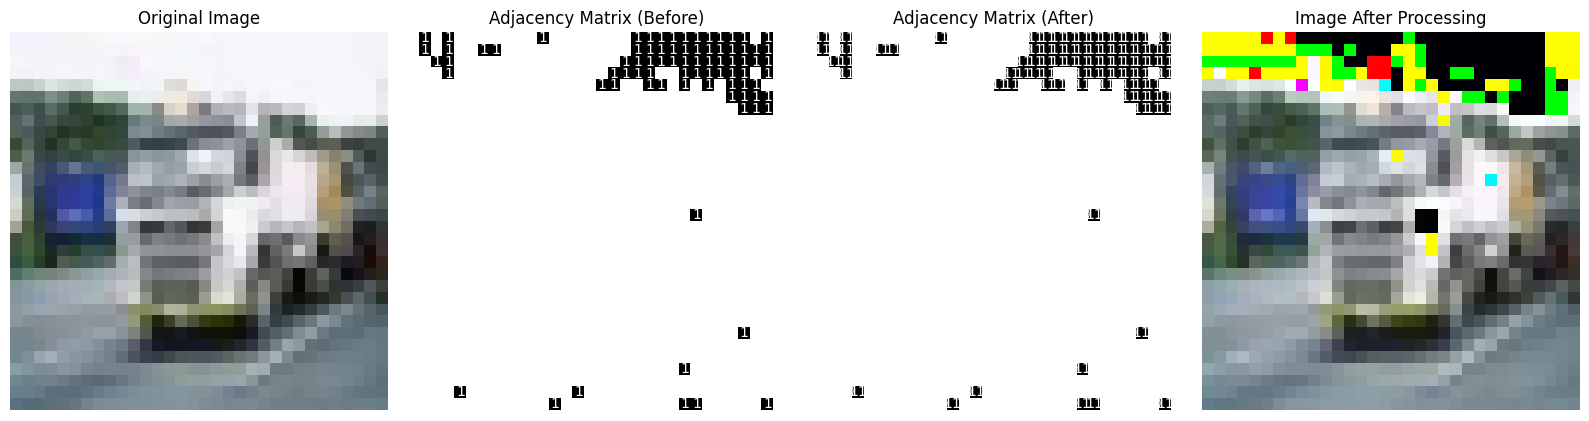

In [ ]:

example_index = 1000
example_image = x_train[example_index]
example_adjacency_matrix_before = x_train_adj[example_index]

# Processing the adjacency matrix by increasing all values by a constant factor
factor = 10
example_adjacency_matrix_after = example_adjacency_matrix_before + factor

plt.figure(figsize=(16, 6))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(example_image)
plt.title('Original Image')
plt.axis('off')

# Display the adjacency matrix before processing
plt.subplot(1, 4, 2)
plt.imshow(example_adjacency_matrix_before, cmap='binary')
plt.title('Adjacency Matrix (Before)')
plt.axis('off')
for i in range(example_adjacency_matrix_before.shape[0]):
    for j in range(example_adjacency_matrix_before.shape[1]):
        plt.text(j, i, str(int(example_adjacency_matrix_before[i, j])),
                 ha='center', va='center', color='white')

# Display the adjacency matrix after processing
plt.subplot(1, 4, 3)
plt.imshow(example_adjacency_matrix_after, cmap='binary')
plt.title('Adjacency Matrix (After)')
plt.axis('off')
for i in range(example_adjacency_matrix_after.shape[0]):
    for j in range(example_adjacency_matrix_after.shape[1]):
        plt.text(j, i, str(int(example_adjacency_matrix_after[i, j])),
                 ha='center', va='center', color='white')

# Display the processed image
plt.subplot(1, 4, 4)
processed_image = np.clip(example_image + factor, 0, 255)  # Ensure image values are within [0, 255]
plt.imshow(processed_image.astype(np.uint8))  # Displaying the processed image
plt.title('Image After Processing')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the CNN model architecture
def image_cnn(input_shape, num_classes):
    model_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(model_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    model_output = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=model_input, outputs=model_output)
    return model

# Define dataset parameters
input_shape = x_train.shape[1:]
num_classes = 10

# Instantiate the CNN model
model = image_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1407/1407 [==============================] - 13s 6ms/step - loss: 1.5699 - accuracy: 0.4234 - val_loss: 1.2871 - val_accuracy: 0.5428
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2077 - accuracy: 0.5713 - val_loss: 1.1462 - val_accuracy: 0.5992
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0533 - accuracy: 0.6284 - val_loss: 1.0108 - val_accuracy: 0.6468
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9553 - accuracy: 0.6629 - val_loss: 0.9375 - val_accuracy: 0.6660
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8782 - accuracy: 0.6917 - val_loss: 0.8730 - val_accuracy: 0.6958
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8190 - accuracy: 0.7136 - val_loss: 0.8796 - val_accuracy: 0.6940
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7694 - accuracy: 0.7309 - val_loss: 0.9025 - val_accuracy